In [1]:
## imports

import requests
import pandas as pd 
import matplotlib.pyplot as plt
import json
import time
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Practice 

In [2]:
# Create url for API call.
base_url = 'https://api.pushshift.io/reddit/search/submission/'

In [3]:
params_plant = {
    'subreddit': 'PlantBasedDiet',
    'size': 100
    
}

In [4]:
# Make request
res = requests.get(base_url, params_plant)

In [5]:
# Request response code
res.status_code

200

In [6]:
## setting json to be data var
data = res.json()

In [7]:
## posts will be the dictionary of posts
posts = data['data']

In [8]:
## the number of posts you can pull max at one time
len(posts)

100

In [9]:
f = pd.DataFrame(posts)

In [10]:
f.head()

all_awardings  allow_live_comments               author  \
0            []                False         apsg33backup   
1            []                False    bingbongtake2long   
2            []                False  Vegan_Pixie_Warrior   
3            []                False     Wandering_Cookie   
4            []                False          ScatheX1022   

  author_flair_css_class                  author_flair_richtext  \
0                   None                                     []   
1                   None                                     []   
2                   None                                     []   
3                   None                                     []   
4                   None  [{'e': 'text', 't': 'for my health'}]   

  author_flair_text author_flair_type author_fullname  author_is_blocked  \
0              None              text     t2_c1b2etat              False   
1              None              text     t2_51d47hrz              False   
2              None              text     t2_9i7z7jmm              False   
3              None              text     t2_e2zn3lt2              False   
4     for my health          richtext     t2_5z3xrcez              False   

  author_patreon_flair  ... media media_embed  secure_media  \
0                False  ...   NaN         NaN           NaN   
1                False  ...   NaN         NaN           NaN   
2                False  ...   NaN         NaN           NaN   
3                False  ...   NaN         NaN           NaN   
4                False  ...   NaN         NaN           NaN   

   secure_media_embed  author_cakeday crosspost_parent crosspost_parent_list  \
0                 NaN             NaN              NaN                   NaN   
1                 NaN             NaN              NaN                   NaN   
2                 NaN             NaN              NaN                   NaN   
3                 NaN             NaN              NaN                   NaN   
4                 NaN             NaN              NaN                   NaN   

  author_flair_background_color banned_by  is_gallery  
0                           NaN       NaN         NaN  
1                           NaN       NaN         NaN  
2                           NaN       NaN         NaN  
3                           NaN       NaN         NaN  
4                           NaN       NaN         NaN  

[5 rows x 78 columns]

In [11]:
f[['subreddit', 'selftext', 'title']].head()

subreddit                                           selftext  \
0  PlantBasedDiet  I need to work on my diet because I feel bloat...   
1  PlantBasedDiet                                                      
2  PlantBasedDiet                                                      
3  PlantBasedDiet                                          [removed]   
4  PlantBasedDiet                                                      

                                               title  
0  HELP GUYS: 💜I'm finally taking the plunge for ...  
1                     🎶I’m in love with a juicerrrr🎶  
2  Absolutely love the memes that debug your brai...  
3                         Favorite crockpot recipes?  
4  Powered by plants 💚 🥑 Primarily green smoothie...

## Generating Posts For First Subreddit

In [12]:
## creating a function to pull about 1500 posts

def api_reddit(url, param, pulls, post_list):
    for num in range(int(pulls)):
        print(f"Pulling data attempt number {num +1}")
        
        res = requests.get(url, params = param)
        
        if res.status_code == 200:
            data = res.json()
            post_list.extend(data['data'])
            
            before = data['data'][99]['created_utc']
            param['before'] = before
            
        else:
            print("There has been an error. The code is: ", res.status_code)
            break
            
        time.sleep(2)
    return post_list
            

In [13]:
param = {
    'subreddit': 'PlantBasedDiet',
    'size': 100,
    'selftext:not': '[removed]'}

url = 'https://api.pushshift.io/reddit/search/submission/'

pulls = 45

post_list = []

In [14]:
## calling the function
api_reddit(url, param, pulls, post_list)

Pulling data attempt number 1
Pulling data attempt number 2
Pulling data attempt number 3
Pulling data attempt number 4
Pulling data attempt number 5
Pulling data attempt number 6
Pulling data attempt number 7
Pulling data attempt number 8
Pulling data attempt number 9
Pulling data attempt number 10
Pulling data attempt number 11
Pulling data attempt number 12
Pulling data attempt number 13
Pulling data attempt number 14
Pulling data attempt number 15
Pulling data attempt number 16
There has been an error. The code is:  502


[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'apsg33backup',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_c1b2etat',
  'author_is_blocked': False,
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1633623259,
  'domain': 'self.PlantBasedDiet',
  'full_link': 'https://www.reddit.com/r/PlantBasedDiet/comments/q3cimk/help_guys_im_finally_taking_the_plunge_for_a/',
  'gildings': {},
  'id': 'q3cimk',
  'is_created_from_ads_ui': False,
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_

In [15]:
len(post_list)

1500

In [16]:
## creating a DF
plant_based = pd.DataFrame(post_list)

In [17]:
## checking the DF
plant_based.head()

all_awardings  allow_live_comments               author  \
0            []                False         apsg33backup   
1            []                False    bingbongtake2long   
2            []                False  Vegan_Pixie_Warrior   
3            []                False          ScatheX1022   
4            []                False        newibsaccount   

  author_flair_css_class                  author_flair_richtext  \
0                   None                                     []   
1                   None                                     []   
2                   None                                     []   
3                   None  [{'e': 'text', 't': 'for my health'}]   
4                   None                                     []   

  author_flair_text author_flair_type author_fullname author_is_blocked  \
0              None              text     t2_c1b2etat             False   
1              None              text     t2_51d47hrz             False   
2              None              text     t2_9i7z7jmm             False   
3     for my health          richtext     t2_5z3xrcez             False   
4              None              text     t2_31y5rb2t             False   

  author_patreon_flair  ... author_cakeday crosspost_parent  \
0                False  ...            NaN              NaN   
1                False  ...            NaN              NaN   
2                False  ...            NaN              NaN   
3                False  ...            NaN              NaN   
4                False  ...            NaN              NaN   

   crosspost_parent_list  author_flair_background_color  banned_by is_gallery  \
0                    NaN                            NaN        NaN        NaN   
1                    NaN                            NaN        NaN        NaN   
2                    NaN                            NaN        NaN        NaN   
3                    NaN                            NaN        NaN        NaN   
4                    NaN                            NaN        NaN        NaN   

  gallery_data media_metadata edited poll_data  
0          NaN            NaN    NaN       NaN  
1          NaN            NaN    NaN       NaN  
2          NaN            NaN    NaN       NaN  
3          NaN            NaN    NaN       NaN  
4          NaN            NaN    NaN       NaN  

[5 rows x 81 columns]

In [18]:
df_1 = plant_based[['id','subreddit', 'selftext', 'title']]

In [19]:
df_1.duplicated(subset=['selftext']).value_counts()

True     982
False    518
dtype: int64

In [20]:
## dropping the duplicates based on selftext but keeping the last occurence of the duplicated row
df_1 = df_1.drop_duplicates(subset=['selftext'], keep ='last')

In [21]:
df_1

id       subreddit  \
0     q3cimk  PlantBasedDiet   
4     q33cmg  PlantBasedDiet   
5     q2xoxf  PlantBasedDiet   
6     q2rt99  PlantBasedDiet   
9     q2paa9  PlantBasedDiet   
...      ...             ...   
1484  nfcar3  PlantBasedDiet   
1488  nexcrd  PlantBasedDiet   
1489  nevpyv  PlantBasedDiet   
1491  net5eg  PlantBasedDiet   
1499  ne5hy9  PlantBasedDiet   

                                               selftext  \
0     I need to work on my diet because I feel bloat...   
4     tl;dr Multiple urgent bowel movements every da...   
5     Hey\n\nSorry if thats a stupid question.\nA fe...   
6     I have developed an eating disorder and an ove...   
9     I have some soy sauce laying around here and I...   
...                                                 ...   
1484  Would you recomend starting with Dr. Michael G...   
1488  Just bought a tofu press and looking for marin...   
1489  I know there's a worry about sugar intake when...   
1491  Hello!\n\nI personally know how difficult it c...   
1499                                                      

                                                  title  
0     HELP GUYS: 💜I'm finally taking the plunge for ...  
4     Has anyone managed to get down to 1-2 non-urge...  
5     Constructive feedback for a vegan restaurant o...  
6     What are the BENEFITS of normally-high blood s...  
9     does anyone know a good low-calorie sauce that...  
...                                                 ...  
1484                                             Books!  
1488        Anyone have any Good tofu marinade recipes?  
1489  If I'm drinking multiple shakes a day - what i...  
1491       Consumer Lifestyle With Dietary Restrictions  
1499                                  Plant Based Tacos  

[518 rows x 4 columns]

## Generating Posts For Second Subreddit

In [2]:
## creating a function to pull about 1500 posts

def api_reddit(url, param, pulls, post_list):
    for num in range(int(pulls)):
        print(f"Pulling data attempt number {num +1}")
        
        res = requests.get(url, params = param)
        
        if res.status_code == 200:
            data = res.json()
            post_list.extend(data['data'])
            
            before = data['data'][99]['created_utc']
            param['before'] = before
            
        else:
            print("There has been an error. The code is: ", res.status_code)
            break
            
        time.sleep(2)
    return post_list

In [3]:
param = {
    'subreddit': 'nutrition',
    'size': 100,
    'selftext:not': '[removed]'}

url = 'https://api.pushshift.io/reddit/search/submission/'

pulls = 20

post_list = []

In [4]:
api_reddit(url, param, pulls, post_list)

Pulling data attempt number 1
Pulling data attempt number 2
Pulling data attempt number 3
Pulling data attempt number 4
Pulling data attempt number 5
Pulling data attempt number 6
Pulling data attempt number 7


IndexError: list index out of range

In [25]:
## creating a DF
nutrition = pd.DataFrame(post_list)

In [26]:
nutrition.head()

all_awardings  allow_live_comments             author  \
0            []                False  Many_Chipmunk3710   
1            []                False         Icy_Ad2505   
2            []                False    cultivatewisdom   
3            []                False     handle_ah_brah   
4            []                False            Sam9426   

  author_flair_css_class author_flair_richtext author_flair_text  \
0                   None                    []              None   
1                   None                    []              None   
2                   None                    []              None   
3                   None                    []              None   
4                   None                    []              None   

  author_flair_type author_fullname author_is_blocked author_patreon_flair  \
0              text     t2_d2fwsmtu             False                False   
1              text     t2_5m5i9ghk             False                False   
2              text     t2_6h356vsi             False                False   
3              text     t2_8h1qyzu0             False                False   
4              text     t2_3th3fesp             False                False   

   ... author_flair_template_id author_flair_text_color  banned_by  \
0  ...                      NaN                     NaN        NaN   
1  ...                      NaN                     NaN        NaN   
2  ...                      NaN                     NaN        NaN   
3  ...                      NaN                     NaN        NaN   
4  ...                      NaN                     NaN        NaN   

   removed_by_category  edited link_flair_css_class link_flair_text  \
0                  NaN     NaN                  NaN             NaN   
1                  NaN     NaN                  NaN             NaN   
2                  NaN     NaN                  NaN             NaN   
3                  NaN     NaN                  NaN             NaN   
4                  NaN     NaN                  NaN             NaN   

  suggested_sort author_cakeday  distinguished  
0            NaN            NaN            NaN  
1            NaN            NaN            NaN  
2            NaN            NaN            NaN  
3            NaN            NaN            NaN  
4            NaN            NaN            NaN  

[5 rows x 72 columns]

In [151]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  2000 non-null   object 
 1   allow_live_comments            2000 non-null   bool   
 2   author                         2000 non-null   object 
 3   author_flair_css_class         12 non-null     object 
 4   author_flair_richtext          1943 non-null   object 
 5   author_flair_text              13 non-null     object 
 6   author_flair_type              1943 non-null   object 
 7   author_fullname                1943 non-null   object 
 8   author_is_blocked              1431 non-null   object 
 9   author_patreon_flair           1943 non-null   object 
 10  author_premium                 1943 non-null   object 
 11  awarders                       2000 non-null   object 
 12  can_mod_post                   2000 non-null   b

In [27]:
df_2 = nutrition[['id','subreddit', 'selftext', 'title']]

In [28]:
nutrition.duplicated(subset=['selftext']).value_counts()

False    1919
True       81
dtype: int64

In [29]:
## dropping duplicated selftext subset but keep the last occurence of that duplicate

df_2 = df_2.drop_duplicates(subset=['selftext'], keep ='last')

In [30]:
df_2

id  subreddit                                           selftext  \
0     q3bntj  nutrition  And how do you deal with cravings especially f...   
1     q3b2ml  nutrition  If you are ever in the store and see those big...   
2     q38jda  nutrition  Would love to know everyone's thoughts on the ...   
3     q37jj5  nutrition  I keep seeing stuff about how food today is (a...   
4     q3726w  nutrition  Does someone who has knowledge about this know...   
...      ...        ...                                                ...   
1995  o04opc  nutrition  Hi all. My girlfriend has almost finished a di...   
1996  o01flg  nutrition  My friends mom ordered these online. Said they...   
1997  o00shw  nutrition  I can’t seem to find a consensus on this. Is t...   
1998  o00ckg  nutrition  What’s the best way to measure all dry ingredi...   
1999  nzyjbz  nutrition                                                NaN   

                                                  title  
0     People who aren't overweight or have acne, wha...  
1                                   Stop Buying Granola  
2                  What's the consensus with spirulina?  
3                                   30% less nutritious  
4     Is it safe to eat 75 grams (3 ounces) of snow ...  
...                                                 ...  
1995  Almost finished a diploma of nutrition. What n...  
1996          Apricot seeds, are they anything special?  
1997              Is imitation vanilla extract healthy?  
1998                Measuring Method for All-In-One Mix  
1999  What do you put in a smoothie so it tastes gre...  

[1919 rows x 4 columns]

In [31]:
## extracting rows up to 1700

df2 = df_2.iloc[:1700,:]

In [32]:
## now contains 1620 rows
df2

id  subreddit                                           selftext  \
0     q3bntj  nutrition  And how do you deal with cravings especially f...   
1     q3b2ml  nutrition  If you are ever in the store and see those big...   
2     q38jda  nutrition  Would love to know everyone's thoughts on the ...   
3     q37jj5  nutrition  I keep seeing stuff about how food today is (a...   
4     q3726w  nutrition  Does someone who has knowledge about this know...   
...      ...        ...                                                ...   
1749  o88d03  nutrition  I'm pretty anoyed about the nutrition camps of...   
1750  o87xx9  nutrition  I’m 29. I’m over weight. I have horrible blood...   
1751  o8598m  nutrition  Psyllium are seeds from the Plantago sp. and t...   
1752  o83b1z  nutrition        Easiest and most absorbable way to up iron?   
1753  o838n1  nutrition  Let's say glycogen stores are depleted, so the...   

                                                  title  
0     People who aren't overweight or have acne, wha...  
1                                   Stop Buying Granola  
2                  What's the consensus with spirulina?  
3                                   30% less nutritious  
4     Is it safe to eat 75 grams (3 ounces) of snow ...  
...                                                 ...  
1749  Is there any real evidence that fats or carboh...  
1750                            Headed to a early grave  
1751             What do you think about Psyllium husk?  
1752                               Trying to up my iron  
1753  During gluconeogenesis are fats used before am...  

[1700 rows x 4 columns]

## Combined DataFrames

In [33]:
## concatenating both dataframes

combined_df = pd.concat([df_1, df2.reset_index(drop=True)], axis=0)

In [34]:
combined_df

id       subreddit  \
0     q3cimk  PlantBasedDiet   
4     q33cmg  PlantBasedDiet   
5     q2xoxf  PlantBasedDiet   
6     q2rt99  PlantBasedDiet   
9     q2paa9  PlantBasedDiet   
...      ...             ...   
1695  o88d03       nutrition   
1696  o87xx9       nutrition   
1697  o8598m       nutrition   
1698  o83b1z       nutrition   
1699  o838n1       nutrition   

                                               selftext  \
0     I need to work on my diet because I feel bloat...   
4     tl;dr Multiple urgent bowel movements every da...   
5     Hey\n\nSorry if thats a stupid question.\nA fe...   
6     I have developed an eating disorder and an ove...   
9     I have some soy sauce laying around here and I...   
...                                                 ...   
1695  I'm pretty anoyed about the nutrition camps of...   
1696  I’m 29. I’m over weight. I have horrible blood...   
1697  Psyllium are seeds from the Plantago sp. and t...   
1698        Easiest and most absorbable way to up iron?   
1699  Let's say glycogen stores are depleted, so the...   

                                                  title  
0     HELP GUYS: 💜I'm finally taking the plunge for ...  
4     Has anyone managed to get down to 1-2 non-urge...  
5     Constructive feedback for a vegan restaurant o...  
6     What are the BENEFITS of normally-high blood s...  
9     does anyone know a good low-calorie sauce that...  
...                                                 ...  
1695  Is there any real evidence that fats or carboh...  
1696                            Headed to a early grave  
1697             What do you think about Psyllium husk?  
1698                               Trying to up my iron  
1699  During gluconeogenesis are fats used before am...  

[2218 rows x 4 columns]

In [35]:
## creating a label column 
## 1 for PlantBasedDiet
## 0 for nutrition

combined_df['label'] = combined_df['subreddit'].map({'PlantBasedDiet':1, 'nutrition':0})

In [36]:
combined_df

id       subreddit  \
0     q3cimk  PlantBasedDiet   
4     q33cmg  PlantBasedDiet   
5     q2xoxf  PlantBasedDiet   
6     q2rt99  PlantBasedDiet   
9     q2paa9  PlantBasedDiet   
...      ...             ...   
1695  o88d03       nutrition   
1696  o87xx9       nutrition   
1697  o8598m       nutrition   
1698  o83b1z       nutrition   
1699  o838n1       nutrition   

                                               selftext  \
0     I need to work on my diet because I feel bloat...   
4     tl;dr Multiple urgent bowel movements every da...   
5     Hey\n\nSorry if thats a stupid question.\nA fe...   
6     I have developed an eating disorder and an ove...   
9     I have some soy sauce laying around here and I...   
...                                                 ...   
1695  I'm pretty anoyed about the nutrition camps of...   
1696  I’m 29. I’m over weight. I have horrible blood...   
1697  Psyllium are seeds from the Plantago sp. and t...   
1698        Easiest and most absorbable way to up iron?   
1699  Let's say glycogen stores are depleted, so the...   

                                                  title  label  
0     HELP GUYS: 💜I'm finally taking the plunge for ...      1  
4     Has anyone managed to get down to 1-2 non-urge...      1  
5     Constructive feedback for a vegan restaurant o...      1  
6     What are the BENEFITS of normally-high blood s...      1  
9     does anyone know a good low-calorie sauce that...      1  
...                                                 ...    ...  
1695  Is there any real evidence that fats or carboh...      0  
1696                            Headed to a early grave      0  
1697             What do you think about Psyllium husk?      0  
1698                               Trying to up my iron      0  
1699  During gluconeogenesis are fats used before am...      0  

[2218 rows x 5 columns]

In [37]:
combined_df.isnull().sum()

id           0
subreddit    0
selftext     1
title        0
label        0
dtype: int64

In [38]:
combined_df.dropna(inplace=True)

## Exploration_1

#### Before Cleaning Text

In [40]:
## Imports

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [39]:
## setting up X and y values
X = combined_df['selftext']
y = combined_df['label']

In [45]:
new_x = combined_df[['selftext']]

In [47]:
new_x['strings'] = new_x['selftext'].apply(lambda x: str(x))

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_40771/3463457773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_x['strings'] = new_x['selftext'].apply(lambda x: str(x))


In [49]:
new_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2217 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   selftext  2217 non-null   object
 1   strings   2217 non-null   object
dtypes: object(2)
memory usage: 52.0+ KB


In [52]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words="english", min_df=3)

In [53]:
cvec.fit(new_x['selftext'])

CountVectorizer(min_df=3, stop_words='english')

In [55]:
selftext_cv = cvec.transform(new_x['selftext'])

In [57]:
selftext_df = pd.DataFrame(selftext_cv.todense(), columns=cvec.get_feature_names())

In [58]:
selftext_df.sum().sort_values(ascending=False).head(15)

like        764
just        753
https       597
protein     586
ve          579
eat         548
diet        548
know        481
food        468
eating      442
day         431
calories    381
foods       369
don         366
com         351
dtype: int64

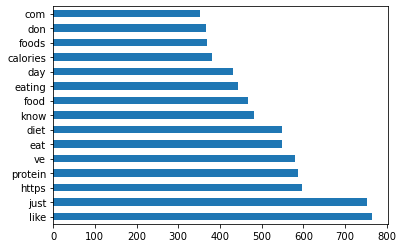

In [60]:
selftext_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [84]:
##using ngram_range to look at words in pairs

# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(new_x['selftext'])
selftext_cv = cvec.transform(new_x['selftext'])
selftext_df = pd.DataFrame(selftext_cv.todense(), columns=cvec.get_feature_names())

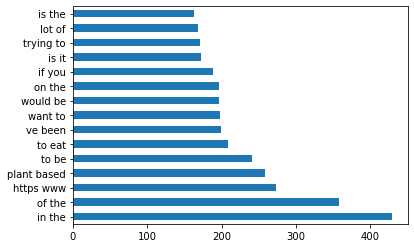

In [85]:
selftext_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [77]:
selftext_df

000 iu  10 000  10 hour  10 minutes  10 of  10 years  100 calories  \
0          0       0        0           0      0         0             0   
1          0       0        0           0      0         0             0   
2          0       0        0           0      0         0             0   
3          0       0        0           0      0         0             0   
4          0       0        0           0      0         0             0   
...      ...     ...      ...         ...    ...       ...           ...   
2212       0       0        0           0      0         0             0   
2213       0       0        0           0      0         0             0   
2214       0       0        0           0      0         0             0   
2215       0       0        0           0      0         0             0   
2216       0       0        0           0      0         0             0   

      100 grams  100 of  100 plant  ...  your stomach  your thoughts  \
0             0       0          0  ...             0              0   
1             0       0          0  ...             0              0   
2             0       0          0  ...             0              0   
3             0       0          0  ...             0              0   
4             0       0          0  ...             0              0   
...         ...     ...        ...  ...           ...            ...   
2212          0       0          0  ...             0              0   
2213          0       0          0  ...             0              0   
2214          0       0          0  ...             0              1   
2215          0       0          0  ...             0              0   
2216          0       0          0  ...             0              0   

      your time  your weekly  your workout  yourself to  youtu be  \
0             0            0             0            0         0   
1             0            0             0            0         0   
2             0            0             0            0         0   
3             0            0             0            0         0   
4             0            0             0            0         0   
...         ...          ...           ...          ...       ...   
2212          0            0             0            0         0   
2213          0            0             0            0         0   
2214          0            0             0            0         0   
2215          0            0             0            0         0   
2216          0            0             0            0         0   

      youtube com  youtube https  zinc and  
0               0              0         0  
1               0              0         0  
2               0              0         0  
3               0              0         0  
4               0              0         0  
...           ...            ...       ...  
2212            0              0         0  
2213            0              0         0  
2214            0              0         0  
2215            0              0         0  
2216            0              0         0  

[2217 rows x 8512 columns]

## Exploration_2

### Before cleaning text

In [86]:
explore = combined_df[['label', 'selftext']]

In [89]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(explore['selftext'])
explore_cv = cvec.transform(explore['selftext'])
explore_df = pd.DataFrame(explore_cv.todense(), columns=cvec.get_feature_names())

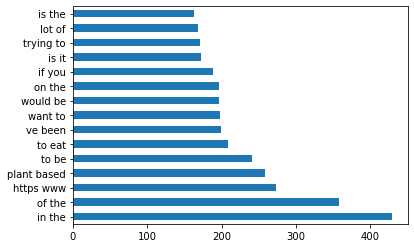

In [91]:
explore_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

------------------------------------------------------------------------------------------

### Cleaning text

In [109]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

In [110]:
## creating functions to clean the selftext column
## taken from towards data science website post

def remove_stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

In [111]:
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

In [133]:
import string

def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [105]:
explore

label                                           selftext
0         1  I need to work on my diet because I feel bloat...
4         1  tl;dr Multiple urgent bowel movements every da...
5         1  Hey\n\nSorry if thats a stupid question.\nA fe...
6         1  I have developed an eating disorder and an ove...
9         1  I have some soy sauce laying around here and I...
...     ...                                                ...
1695      0  I'm pretty anoyed about the nutrition camps of...
1696      0  I’m 29. I’m over weight. I have horrible blood...
1697      0  Psyllium are seeds from the Plantago sp. and t...
1698      0        Easiest and most absorbable way to up iron?
1699      0  Let's say glycogen stores are depleted, so the...

[2217 rows x 2 columns]

In [115]:
explore.loc['selftext'] = explore['selftext'].apply(remove_stopwords)

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_40771/528908199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explore['selftext'] = explore['selftext'].apply(remove_stopwords)


In [120]:
explore['selftext'] = explore['selftext'].apply(lemmatize_text)

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_40771/3387378053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explore['selftext'] = explore['selftext'].apply(lemmatize_text)


In [134]:
explore['selftext'] = explore['selftext'].apply(clean_text)

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_40771/39327711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explore['selftext'] = explore['selftext'].apply(clean_text)


In [135]:
explore

label                                           selftext
0         1  need work diet feel bloated due ibs disease al...
4         1  tl dr multiple urgent bowel movement every day...
5         1  hey sorry thats stupid question week ago wrote...
6         1  developed eating disorder activity problem exe...
9         1  soy sauce laying around like taste think impro...
...     ...                                                ...
1695      0  m pretty anoyed nutrition camp high carbohydra...
1696      0  ’ 29 ’ weight horrible blood lab value pretty ...
1697      0  psyllium seed plantago sp commonly used cookin...
1698      0                        easiest absorbable way iron
1699      0  let s say glycogen store depleted liver glucon...

[2217 rows x 2 columns]

In [142]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(1,3))
cvec.fit(explore['selftext'])
cleaned_cv = cvec.transform(explore['selftext'])
cleaned_df = pd.DataFrame(cleaned_cv.todense(), columns=cvec.get_feature_names())

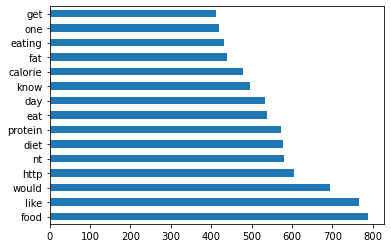

In [143]:
## using one word
cleaned_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [146]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(explore['selftext'])
cleaned_cv = cvec.transform(explore['selftext'])
cleaned_df = pd.DataFrame(cleaned_cv.todense(), columns=cvec.get_feature_names())

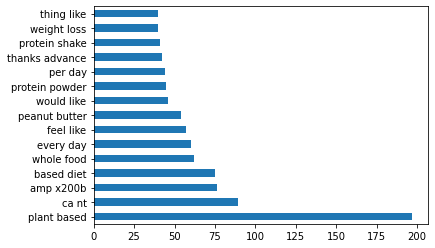

In [147]:
## using two words
cleaned_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Looking at the plant based diet subreddit

In [ ]:
plants = explore[explore['label'] == 1]

In [157]:
### Looking at the 15 most common words in the plant based dataframe 
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(1,3))
cvec.fit(plants['selftext'])
plants_cv = cvec.transform(plants['selftext'])
plants_df = pd.DataFrame(plants_cv.todense(), columns=cvec.get_feature_names())

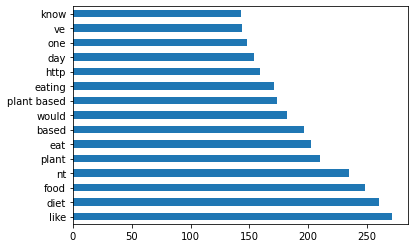

In [158]:
## using one word
plants_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [160]:
### Looking at the 15 most common words in the plant based dataframe 

plants = explore[explore['label'] == 1]

# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(plants['selftext'])
plants_cv = cvec.transform(plants['selftext'])
plants_df = pd.DataFrame(plants_cv.todense(), columns=cvec.get_feature_names())

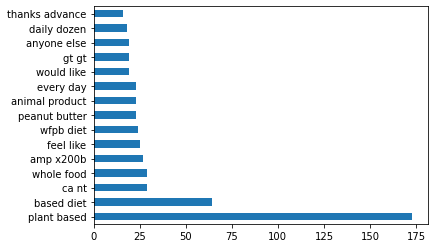

In [161]:

plants_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Looking at nutrition subreddit

In [164]:
nutrition = explore[explore['label'] == 0]

In [165]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(nutrition['selftext'])
nutrition_cv = cvec.transform(nutrition['selftext'])
nutrition_df = pd.DataFrame(nutrition_cv.todense(), columns=cvec.get_feature_names())

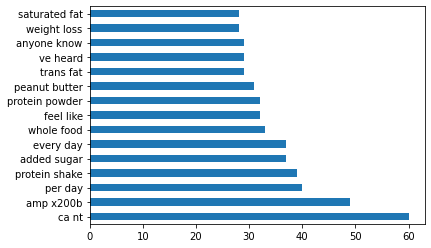

In [166]:

nutrition_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [167]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(1,3))
cvec.fit(nutrition['selftext'])
nutrition_cv = cvec.transform(nutrition['selftext'])
nutrition_df = pd.DataFrame(nutrition_cv.todense(), columns=cvec.get_feature_names())

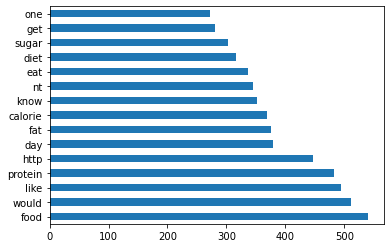

In [168]:
## using one word
nutrition_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [ ]:
df.rename(columns={"A": "a", "B": "c"})

In [177]:
#### re-naming the selftext column to clean_selftext so I can add it to the original DF to run models

explore.rename(columns={'selftext':'cleaned_selftext'}, inplace=True)

/Users/brianna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## Modeling

Setting up data for modeling:
    
   - `X` will be the `selftext` column.
   - `y` will be the `label` column.

In [182]:
combined_df

id       subreddit  \
0     q3cimk  PlantBasedDiet   
4     q33cmg  PlantBasedDiet   
5     q2xoxf  PlantBasedDiet   
6     q2rt99  PlantBasedDiet   
9     q2paa9  PlantBasedDiet   
...      ...             ...   
1695  o88d03       nutrition   
1696  o87xx9       nutrition   
1697  o8598m       nutrition   
1698  o83b1z       nutrition   
1699  o838n1       nutrition   

                                               selftext  \
0     I need to work on my diet because I feel bloat...   
4     tl;dr Multiple urgent bowel movements every da...   
5     Hey\n\nSorry if thats a stupid question.\nA fe...   
6     I have developed an eating disorder and an ove...   
9     I have some soy sauce laying around here and I...   
...                                                 ...   
1695  I'm pretty anoyed about the nutrition camps of...   
1696  I’m 29. I’m over weight. I have horrible blood...   
1697  Psyllium are seeds from the Plantago sp. and t...   
1698        Easiest and most absorbable way to up iron?   
1699  Let's say glycogen stores are depleted, so the...   

                                                  title  label  
0     HELP GUYS: 💜I'm finally taking the plunge for ...      1  
4     Has anyone managed to get down to 1-2 non-urge...      1  
5     Constructive feedback for a vegan restaurant o...      1  
6     What are the BENEFITS of normally-high blood s...      1  
9     does anyone know a good low-calorie sauce that...      1  
...                                                 ...    ...  
1695  Is there any real evidence that fats or carboh...      0  
1696                            Headed to a early grave      0  
1697             What do you think about Psyllium husk?      0  
1698                               Trying to up my iron      0  
1699  During gluconeogenesis are fats used before am...      0  

[2217 rows x 5 columns]

In [170]:
## setting up X and y values
X = combined_df['selftext']
y = combined_df['label']

In [40]:
# baseline score
## distribution of y (value counts of y)
## proportion of majority class // 0 is nutrition class

y.value_counts(normalize=True)

0    0.512202
1    0.487798
Name: label, dtype: float64

In [41]:
## remember to stratify y to keep porportions the same
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

### First Model_Random Forest Classifier_uncleaned data

Code from lesson 5.04 and Cindy Davis

In [102]:
# Let's set a pipeline up with three stages:
# 1. CountVectorizer (transformer)
# 2. TfidfTransformer (transformer) - allows us the option of applying IDF
# 2. Random Forest Classifier (estimator)


cvec_idf_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

# Search over the following values of hyperparameters:
# Maximum number of features fit: 1500, 1800, 2000, 2100
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_params_cvec_idf = {
        'cvec__max_features' : [2100],
        'cvec__ngram_range' : [(1, 3)],
        'cvec__min_df' : [5],
        'rf__n_estimators': [70,80,90],
        'rf__max_depth': [None,12,14,16,18],
        'rf__ccp_alpha': [0],
        'rf__min_samples_leaf':[1,5,10,20],
        'rf__max_features':['auto','log2']
        
}


# Instantiate GridSearchCV.
gs_cvec_idf = GridSearchCV(cvec_idf_pipe,
                      param_grid=pipe_params_cvec_idf,
                      cv=5,
                      verbose=2)
                      

# Fit GridSearch to training data.
gs_cvec_idf.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   1.1s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   1.0s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   1.1s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   1.1s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_features': [2100], 'cvec__min_df': [5],
                         'cvec__ngram_range': [(1, 3)], 'rf__ccp_alpha': [0],
                         'rf__max_depth': [None, 12, 14, 16, 18],
                         'rf__max_features': ['auto', 'log2'],
                         'rf__min_samples_leaf': [1, 5, 10, 20],
                         'rf__n_estimators': [70, 80, 90]},
             verbose=2)

In [105]:
## for model_8
gs_cvec_idf.best_score_

0.784077335762729

In [104]:
# Score model on training set. Model_8
print(gs_cvec_idf.score(X_train, y_train))

0.9991003148897886


In [106]:
## Score model on testing set. Model_8
print(gs_cvec_idf.score(X_test, y_test))

0.7908675799086758


In [107]:
## for model_8
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 80}

In [98]:
## for model_7
gs_cvec_idf.best_score_

0.7696750683267538

In [99]:
# Score model on training set. Model_7
print(gs_cvec_idf.score(X_train, y_train))

0.9991003148897886


In [100]:
## Score model on testing set. Model_7
print(gs_cvec_idf.score(X_test, y_test))

0.7917808219178082


In [101]:
## for model_7
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': None,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 80}

In [92]:
## for model_6
gs_cvec_idf.best_score_

0.7660896851908088

In [93]:
## Score model on training set. Model_6
print(gs_cvec_idf.score(X_train, y_train))

0.9064327485380117


In [94]:
## Score model on testing set. Model_6
print(gs_cvec_idf.score(X_test, y_test))

0.7671232876712328


In [95]:
## for model_6
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': 18,
 'rf__n_estimators': 100}

In [87]:
## for model_5
gs_cvec_idf.best_score_

0.7588905759692276

In [88]:
## Score model on training set. Model_5
print(gs_cvec_idf.score(X_train, y_train))

0.8839406207827261


In [89]:
## Score model on testing set. Model_5
print(gs_cvec_idf.score(X_test, y_test))

0.7625570776255708


In [90]:
## for model_5
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': 14,
 'rf__n_estimators': 90}

In [82]:
## for model_4
gs_cvec_idf.best_score_

0.7566393359651787

In [83]:
## Score model on training set. Model_4
print(gs_cvec_idf.score(X_train, y_train))

0.8753936122357175


In [84]:
## Score model on testing set. Model_4
print(gs_cvec_idf.score(X_test, y_test))

0.7643835616438356


In [85]:
## for model_4
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': 14,
 'rf__n_estimators': 110}

In [77]:
## Score model on training set. Model_3
print(gs_cvec_idf.score(X_train, y_train))

0.832208726945569


In [78]:
## Score model on testing set. Model_3
print(gs_cvec_idf.score(X_test, y_test))

0.7515981735159817


In [80]:
## for model_3
gs_cvec_idf.best_score_

0.7467506832675371

In [79]:
## for model_3
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': 8,
 'rf__n_estimators': 90}

In [ ]:
## Score model on training set. Model_1
print(gs_cvec_idf.score(X_train, y_train))

0.9991003148897886


In [ ]:
## Score model on testing set. Model_1
print(gs_cvec_idf.score(X_test, y_test))

0.7981735159817351


In [ ]:
## for model_1
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'tfidf__use_idf': False,
 'score': 0.7912794817289199}

In [ ]:
## for model_1
gs_cvec_idf.best_score_

0.7912794817289199

In [72]:
## for model_2
gs_cvec_idf.best_score_

0.7314576374126937

In [69]:
## Score model on training set. Model_2
print(gs_cvec_idf.score(X_train, y_train))

0.7336932073774179


In [70]:
## Score model on training set. Model_2
print(gs_cvec_idf.score(X_test, y_test))

0.708675799086758


In [68]:
## for model_2
gs_cvec_idf.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0.01,
 'rf__max_depth': 5,
 'rf__n_estimators': 70,
 'score': 0.7314576374126937}

### Second Model_Voting Classifier_uncleaned data

In [205]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [42]:
X_vote = combined_df['selftext']
y_vote = combined_df['label']

In [43]:
# Split the data into the training and testing sets.
X_train_vt, X_test_vt, y_train_vt, y_test_vt = train_test_split(X_vote,
                                                    y_vote,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [44]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [45]:
# Fit the vectorizer on our corpus.
## only fit data to training data and not testing data
## creates different columns for words and counts how many times they were used
cvec.fit(X_train_vt)

CountVectorizer()

In [46]:
# Transform the corpus.
X_train_vt = cvec.transform(X_train_vt)

In [47]:
# Transform the corpus.
X_test_vt = cvec.transform(X_test_vt)

In [48]:
log_clf = LogisticRegression(max_iter=5000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [49]:
vote_clf = VotingClassifier([
            ('lr', log_clf),
            ('rf',rnd_clf), 
            ('svc', svm_clf)], voting='hard')

params = {
     'svc__C':np.linspace(0.01, 5),
    'svc__kernel':['rbf', 'poly'],
    'svc__degree':[1,2]
}

## Instantiate a GridSearch
gs_svc = GridSearchCV(estimator=vote_clf, param_grid = params, cv=3, verbose=1)

# Fit GS on training data.
gs_svc.fit(X_train_vt, y_train_vt)

#vote_clf.fit(X_train_vt,y_train_vt)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=5000)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('svc',
                                                     SVC(probability=True))]),
             param_grid={'svc__C': array([0.01      , 0.11183673, 0.21367347, 0.3155102 , 0.41734694,
       0.51918367, 0.62102041, 0.72285714, 0.82469388, 0.92653061,
       1.02836735, 1.13020408, 1.23204082, 1.33387755, 1.43571429,
       1....
       2.04673469, 2.14857143, 2.25040816, 2.3522449 , 2.45408163,
       2.55591837, 2.6577551 , 2.75959184, 2.86142857, 2.96326531,
       3.06510204, 3.16693878, 3.26877551, 3.37061224, 3.47244898,
       3.57428571, 3.67612245, 3.77795918, 3.87979592, 3.98163265,
       4.08346939, 4.18530612, 4.28714

In [50]:
# Evaluate model_1
gs_svc.score(X_test_vt, y_test_vt)

0.7974452554744526

In [51]:
#model_1
gs_svc.score(X_train_vt, y_train_vt)

0.9901034637876743

In [120]:
#model_1
gs_svc.score(X_test_vt, y_test_vt)

0.8036529680365296

In [52]:
## code from hands on machine learning with scikit-learn book

#model_1
for clf in (log_clf, rnd_clf,svm_clf):
    clf.fit(X_train_vt,y_train_vt)
    y_pred = clf.predict(X_test_vt)
    print(f'{clf}: {accuracy_score(y_test_vt,y_pred)}')

LogisticRegression(max_iter=5000): 0.7956204379562044
RandomForestClassifier(): 0.7773722627737226
SVC(probability=True): 0.7563868613138686


In [53]:
#model_1
gs_svc.best_params_

{'svc__C': 3.1669387755102036, 'svc__degree': 1, 'svc__kernel': 'poly'}

In [54]:
#model_1
d = {'predicted': gs_svc.predict(X_test_vt), 'actual':y_test_vt}

In [55]:
df = pd.DataFrame(data=d)

In [56]:
#model_1
df

predicted  actual
2922          1       1
3468          0       1
1508          0       0
1297          0       0
1524          0       0
...         ...     ...
2692          1       1
1990          1       1
1596          0       0
59            0       1
1841          1       1

[1096 rows x 2 columns]

In [57]:
#model_1

# Find all indices where predicted and true results 
# aren't the same, then save in an array.
row_ids = df[df['predicted'] != df['actual']]

In [58]:
#model_1
row_ids

predicted  actual
3468          0       1
435           0       1
3686          0       1
205           1       0
2691          0       1
...         ...     ...
1697          0       1
2137          0       1
3658          0       1
282           0       1
59            0       1

[222 rows x 2 columns]

### First Model_Random Forest Classifier_ cleaned data

In [183]:
explore

label                                   cleaned_selftext
0         1  need work diet feel bloated due ibs disease al...
4         1  tl dr multiple urgent bowel movement every day...
5         1  hey sorry thats stupid question week ago wrote...
6         1  developed eating disorder activity problem exe...
9         1  soy sauce laying around like taste think impro...
...     ...                                                ...
1695      0  m pretty anoyed nutrition camp high carbohydra...
1696      0  ’ 29 ’ weight horrible blood lab value pretty ...
1697      0  psyllium seed plantago sp commonly used cookin...
1698      0                        easiest absorbable way iron
1699      0  let s say glycogen store depleted liver glucon...

[2217 rows x 2 columns]

In [229]:
X_clean = explore['cleaned_selftext']
y_clean = explore['label']

In [232]:
## remember to stratify y to keep porportions the same
# Split the data into the training and testing sets.
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,
                                                    y_clean,
                                                    test_size=0.33,                            
                                                    stratify=y,
                                                    random_state=42)

In [187]:
# Let's set a pipeline up with three stages:
# 1. CountVectorizer (transformer)
# 2. TfidfTransformer (transformer) - allows us the option of applying IDF
# 2. Random Forest Classifier (estimator)


cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

# Search over the following values of hyperparameters:
# Maximum number of features fit: 1500, 1800, 2000, 2100
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_params_cvec= {
        'cvec__max_features' : [2100],
        'cvec__ngram_range' : [(1, 3)],
        'cvec__min_df' : [5],
        'rf__n_estimators': [70,80,90],
        'rf__max_depth': [None,12,14,16,18],
        'rf__ccp_alpha': [0],
        'rf__min_samples_leaf':[1,5,10,20],
        'rf__max_features':['auto','log2']
        
}


# Instantiate GridSearchCV.
gs_cvec= GridSearchCV(cvec_pipe,
                      param_grid=pipe_params_cvec,
                      cv=5,
                      verbose=2)
                      

# Fit GridSearch to training data.
gs_cvec.fit(X_train_clean, y_train_clean)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.5s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.4s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.4s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.5s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_features': [2100], 'cvec__min_df': [5],
                         'cvec__ngram_range': [(1, 3)], 'rf__ccp_alpha': [0],
                         'rf__max_depth': [None, 12, 14, 16, 18],
                         'rf__max_features': ['auto', 'log2'],
                         'rf__min_samples_leaf': [1, 5, 10, 20],
                         'rf__n_estimators': [70, 80, 90]},
             verbose=2)

In [188]:
gs_cvec.best_score_

0.8505050505050505

In [189]:
## Score model on training set. Model_1
print(gs_cvec.score(X_train_clean, y_train_clean))

0.997979797979798


In [190]:
## Score model on training set. Model_1
print(gs_cvec.score(X_test_clean, y_test_clean))

0.8483606557377049


In [191]:
## for model_1
gs_cvec.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 70}

In [192]:
#model_1
d_clean_1 = {'predicted': gs_cvec.predict(X_test_clean), 'actual':y_test_clean}

In [193]:
df_cleaned_1 = pd.DataFrame(data=d_clean_1)

In [194]:
df_cleaned_1

predicted  actual
1699          0       0
562           0       0
537           0       0
1437          0       0
1014          0       0
...         ...     ...
872           0       0
1082          0       1
1255          0       0
524           0       0
1027          0       1

[732 rows x 2 columns]

In [195]:

# Find all indices where predicted and true results 
# aren't the same, then save in an array.
incorrect_ids = df_cleaned_1[df_cleaned_1['predicted'] != df_cleaned_1['actual']]

In [196]:
incorrect_ids

predicted  actual
57            0       1
35            0       1
1369          0       1
988           0       1
156           0       1
...         ...     ...
664           0       1
254           0       1
437           0       1
1082          0       1
1027          0       1

[111 rows x 2 columns]

### Second Model_Voting Classifier_cleaned data

In [236]:
X_clean = explore['cleaned_selftext']
y_clean = explore['label']

In [237]:
## remember to stratify y to keep porportions the same
# Split the data into the training and testing sets.
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,
                                                    y_clean,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [238]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(max_features=2100, min_df= 5)

In [239]:
# Fit the vectorizer on our corpus.
## only fit data to training data and not testing data
## creates different columns for words and counts how many times they were used
cvec.fit(X_train_clean)

CountVectorizer(max_features=2100, min_df=5)

In [240]:
# Transform the corpus.
X_train_clean = cvec.transform(X_train_clean)

In [241]:
# Transform the corpus.
X_test_clean = cvec.transform(X_test_clean)

In [242]:
log_clf = LogisticRegression(max_iter=5000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [224]:
vote_clf = VotingClassifier([
            ('lr', log_clf),
            ('rf',rnd_clf), 
            ('svc', svm_clf)], voting='hard')

params = {
     'svc__C':[1,2,3,4,5],
    'svc__kernel':['rbf', 'poly'],
    'svc__degree':[1,2]
}

## Instantiate a GridSearch
gs = GridSearchCV(estimator=vote_clf, param_grid = params, cv=3, verbose=1)

# Fit GS on training data.
gs.fit(X_train_clean, y_train_clean)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=5000)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('svc',
                                                     SVC(probability=True))]),
             param_grid={'svc__C': [1, 2, 3, 4, 5], 'svc__degree': [1, 2],
                         'svc__kernel': ['rbf', 'poly']},
             verbose=1)

In [213]:
## model1_hard
gs.best_score_

0.8491582491582492

In [214]:
## model1_hard
gs.score(X_test_clean, y_test_clean)

0.8510928961748634

In [215]:
## model1_hard
gs.score(X_train_clean, y_train_clean)

0.9791245791245792

In [216]:
## model1_hard
gs.best_params_

{'svc__C': 2, 'svc__degree': 1, 'svc__kernel': 'rbf'}

In [225]:
#model_1
d_clean_2 = {'predicted': gs.predict(X_test_clean), 'actual':y_test_clean}

In [226]:
df_cleaned_2 = pd.DataFrame(data=d_clean_2)

In [227]:
df_cleaned_2

predicted  actual
1699          0       0
562           0       0
537           0       0
1437          0       0
1014          0       0
...         ...     ...
872           0       0
1082          0       1
1255          0       0
524           0       0
1027          0       1

[732 rows x 2 columns]

In [233]:

# Find all indices where predicted and true results 
# aren't the same, then save in an array.
incorrect_ids_2 = df_cleaned_2[df_cleaned_2['predicted'] != df_cleaned_2['actual']]

In [234]:
incorrect_ids_2

predicted  actual
57            0       1
35            0       1
329           0       1
1369          0       1
247           0       1
...         ...     ...
664           0       1
254           0       1
437           0       1
1082          0       1
1027          0       1

[112 rows x 2 columns]

In [243]:
for clf in (log_clf, rnd_clf,svm_clf):
    clf.fit(X_train_clean,y_train_clean)
    y_pred = clf.predict(X_test_clean)
    print(f'{clf}: {accuracy_score(y_test_clean,y_pred)}')

LogisticRegression(max_iter=5000): 0.8210382513661202
RandomForestClassifier(): 0.8346994535519126
SVC(): 0.819672131147541


In [245]:
cm = confusion_matrix(y_test_clean, y_pred)

In [246]:
tn, fp, fn, tp = cm.ravel()

In [247]:
print(f"True Neg: {tn}")
print(f"False Pos: {fp}")
print(f"False Neg: {fn}")
print(f"True Pos: {tp}")

True Neg: 559
False Pos: 2
False Neg: 130
True Pos: 41


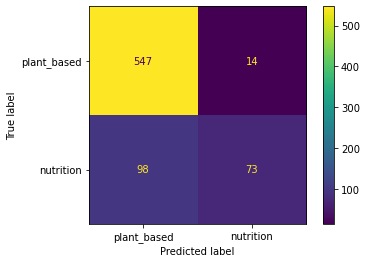

In [250]:
plot_confusion_matrix(gs, X_test_clean,y_test_clean, display_labels=['plant_based','nutrition']);

### Conclusion

After analyzing these two subreddits, plant based diet and nutrition, I can pass along the insights I gained to the marketing team to help promote our new product. 

They should make sure to emphasize that our product has no added sugars or trans fat. In addition it seems that peanut butter is one of the most frequent words in both subreddits. I think more analysis such as polarity analysis needs to be done on those specific posts that mention peanut butter in order to tell if these people are talking about in a positive or negative way? If it’s positive perhaps we should try to incorporate peanut butter flavors into our product. 

Although my clean data models have decent accuracy scores and some variance I am confident that they perform well for this specific purpose-- predicting which posts came from which subreddit. For this to be more informative, I would have to do some more cleaning of the posts in the plant based diet subredits. I think adding more data would also help in addition to creating a customized list of stop words. 